In [1]:
from SimPEG import *
# %matplotlib notebook
% pylab inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Useful sites:

http://docs.simpeg.xyz/en/latest/api_Utils.html#module-SimPEG.Utils.meshutils

In [2]:
# %pylab inline

In [3]:
mesh = Mesh.TensorMesh([20, 20, 20], "CCN")

In [6]:
mesh.writeUBC("SPexamples/mesh.txt")

# $\nabla \cdot \sigma \nabla \phi = \nabla \cdot (L_v\cdot \vec{u}) = q$

# $\mathbf{Div} \mathbf{M}_{\sigma} \mathbf{Grad} = \mathbf{rhs}$

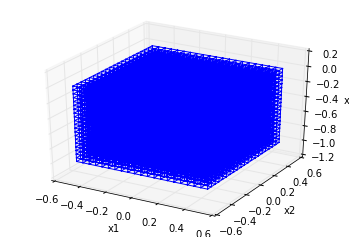

In [7]:
mesh.plotGrid()

In [8]:
sigma = np.ones(mesh.nC)*0.01

In [9]:
Div = mesh.faceDiv
Msig = mesh.getFaceInnerProduct(sigma)
mesh.setCellGradBC('dirichlet')
Grad = mesh.cellGrad

In [10]:
A = Div*Msig*Grad

In [11]:
indSrc = Utils.closestPoints(mesh, np.array([0.3, 0., 0.]))
indSinc = Utils.closestPoints(mesh, np.array([-0.3, 0., 0.]))

In [12]:
q = np.zeros(mesh.nC)

In [13]:
q[indSinc] = -1.
q[indSrc] = 1.

In [14]:
Ainv = Solver(A)

In [15]:
sol = Ainv*q

In [16]:
e = Grad*sol

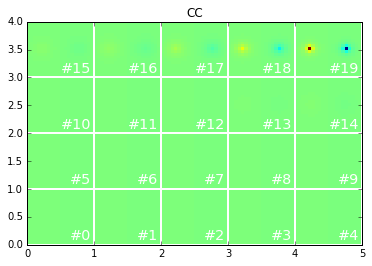

In [17]:
mesh.plotImage(sol)

-0.024999999999999911

In [31]:
SOL = sol.reshape((20, 20, 20), order="F")

In [37]:
indz = 19
mesh.vectorCCz[indz]

-0.024999999999999911

$P \phi = data$

$P$: projection matrix onto receiver locations

In [61]:
x = np.linspace(-0.4, 0.4, 21)
rxlocM = np.c_[x-0.02, np.zeros_like(x), np.ones_like(x)*mesh.vectorCCz[indz]]
rxlocN = np.c_[x+0.02, np.zeros_like(x), np.ones_like(x)*mesh.vectorCCz[indz]]

In [74]:
Pm = mesh.getInterpolationMat(rxlocM, locType="CC")
Pn = mesh.getInterpolationMat(rxlocN, locType="CC")

In [75]:
data = Pm*sol -Pn*sol

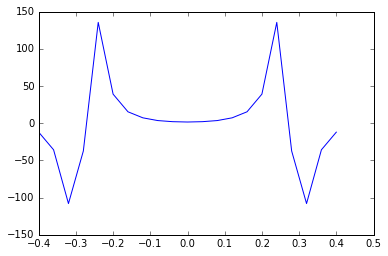

In [76]:
plt.plot(rxloc[:,0], data)

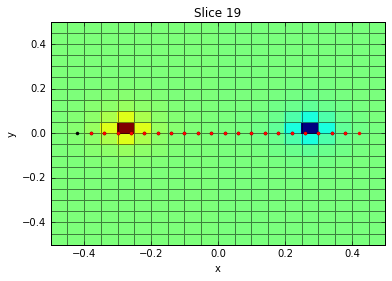

In [65]:
mesh.plotSlice(sol, ind=indz, grid=True)
plt.plot(rxlocM[:,0], rxlocM[:,1], 'k.')
plt.plot(rxlocN[:,0], rxlocM[:,1], 'r.')

In [66]:
mesh.writeModelUBC("./SPexamples/potential.txt", sol)

In [19]:
sol.shape

(8000L,)

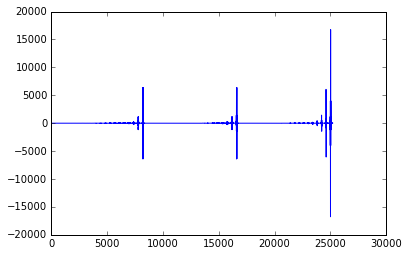

In [20]:
plt.plot(e)

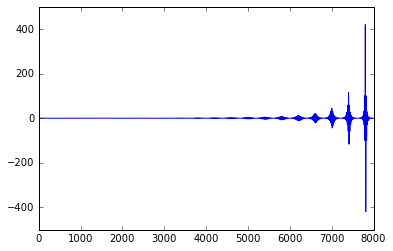

In [21]:
plt.plot(sol)

# $\nabla \cdot \sigma \nabla \phi = -q$

# $\mathbf{A} = \mathbf{Div} \ \mathbf{diag}(\mathbf{Av}_{cc}^{F \ T}\mathbf{\sigma})\mathbf{Grad}\)

\(\mathbf{A}\phi = -\mathbf{q}\$